<a href="https://colab.research.google.com/github/MathBioCU/WSINDy4Weather/blob/main/coefficient_error_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import data

In [ ]:
# Access your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directories
%cd /content/drive/My Drive/WSINDy

Mounted at /content/drive
/content/drive/My Drive/WSINDy


In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File path for dataset
file_path = '/content/drive/My Drive/WSINDy'

# Barotropic
data_path_baro_1 = file_path + '/PyQuasiGeostrophic/barotropic_noise_results_1.csv'
data_path_baro_2 = file_path + '/PyQuasiGeostrophic/barotropic_noise_results_2.csv'
data_path_baro_3 = file_path + '/PyQuasiGeostrophic/barotropic_noise_results_3.csv'

# Spherical
data_path_swe_1 = file_path + '/Dedalus/spherical_noise_results_1.csv'
data_path_swe_2 = file_path + '/Dedalus/spherical_noise_results_2.csv'

In [ ]:
# Combine CSV files into dataframes
barotropic_dfs = [pd.read_csv(data_path_baro_1),
                  pd.read_csv(data_path_baro_2),
                  pd.read_csv(data_path_baro_3)]
barotropic_df = pd.concat(barotropic_dfs, ignore_index=True)

spherical_dfs = [pd.read_csv(data_path_swe_1),
                 pd.read_csv(data_path_swe_2)]
spherical_df = pd.concat(spherical_dfs, ignore_index=True)

# Display the combined DataFrames (optional)
print("Barotropic Dataset:")
print(barotropic_df.head())

print("\nSpherical Dataset:")
print(spherical_df.head())

Barotropic Dataset:
   Experiment  Sigma        E2      Einf  TPR                  PDE
0           0    0.0  0.003738  0.003738  1.0  ζ_t = (-1.00)∇•(ζ𝘂)
1           1    1.0  0.003559  0.003559  1.0  ζ_t = (-1.00)∇•(ζ𝘂)
2           1    2.0  0.003326  0.003326  1.0  ζ_t = (-1.00)∇•(ζ𝘂)
3           1    3.0  0.002783  0.002783  1.0  ζ_t = (-1.00)∇•(ζ𝘂)
4           1    4.0  0.001582  0.001582  1.0  ζ_t = (-1.00)∇•(ζ𝘂)

Spherical Dataset:
   Experiment  Sigma                                   E2      Einf       TPR  \
0           0    0.0  tensor(0.0009, dtype=torch.float64)  0.000907  0.666667   
1           1    1.0                0.0009790700591087954  0.000979  0.666667   
2           1    2.0                 0.002136858851484752  0.002137  0.666667   
3           1    3.0                0.0023282420377379823  0.002328  0.666667   
4           1    4.0                0.0025158482201732683  0.002516  0.666667   

                             PDE  
0  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  
1

In [ ]:
# Replace 'tensor(0.0009, dtype=torch.float64)' with '0.0009'
def replace_tensor_value(value):
    if isinstance(value, str) and "tensor(0.0009" in value:
        return 0.0009
    return value

spherical_df['E2'] = spherical_df['E2'].apply(replace_tensor_value)
print(spherical_df.head())

   Experiment  Sigma                     E2      Einf       TPR  \
0           0    0.0                 0.0009  0.000907  0.666667   
1           1    1.0  0.0009790700591087954  0.000979  0.666667   
2           1    2.0   0.002136858851484752  0.002137  0.666667   
3           1    3.0  0.0023282420377379823  0.002328  0.666667   
4           1    4.0  0.0025158482201732683  0.002516  0.666667   

                             PDE  
0  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  
1  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  
2  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  
3  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  
4  h_t = (-0.00)(𝔻) + (-1.00)(ℚ)  


## Create plots

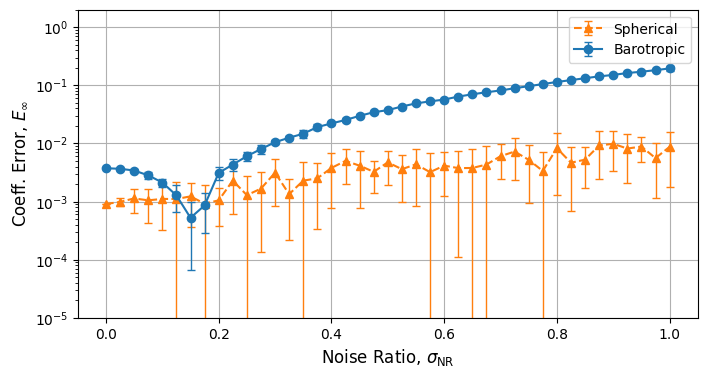

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and variance (from previous step)
result1 = barotropic_df.groupby('Sigma')['Einf'].agg(['mean','var']).reset_index()
result2 = spherical_df.groupby('Sigma')['Einf'].agg(['mean','var']).reset_index()

# Add standard deviation (square root of variance) as the error
result1['std'] = np.sqrt(result1['var'])
result2['std'] = np.sqrt(result2['var'])

# Plot
plt.figure(figsize=(8, 4))
plt.errorbar(0.025 * result2['Sigma'],
             result2['mean'],
             yerr=result2['std'],
             fmt='^',
             #ecolor='blue',
             color = 'tab:orange',
             elinewidth=1,
             capsize=3,
             linestyle='--',
             label='Spherical')
plt.errorbar(0.025 * result1['Sigma'],
             result1['mean'],
             yerr=result1['std'],
             fmt='o',
             #ecolor='blue',
             #color = 'blue',
             elinewidth=1,
             capsize=3,
             linestyle='-',
             label='Barotropic')
plt.xlabel('Noise Ratio, $\\sigma_{\\rm{NR}}$', fontsize=12)
plt.ylabel('Coeff. Error, $E_{\infty}$', fontsize=12)
plt.legend()
plt.yscale('log')
plt.ylim(1e-5,2)
plt.grid(True)
plt.show()

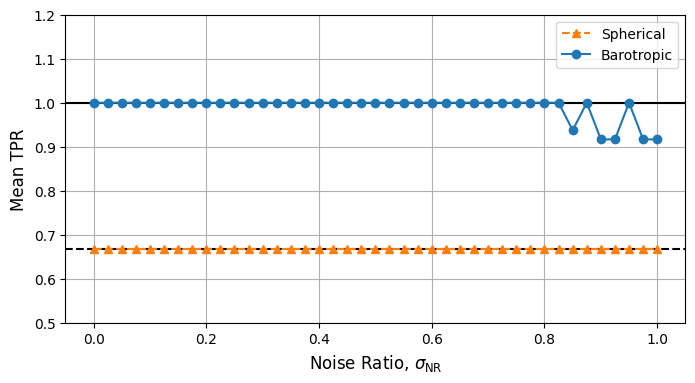

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and variance (from previous step)
result1 = barotropic_df.groupby('Sigma')['TPR'].agg(['mean','var']).reset_index()
result2 = spherical_df.groupby('Sigma')['TPR'].agg(['mean','var']).reset_index()

# Add standard deviation (square root of variance) as the error
result1['std'] = np.sqrt(result1['var'])
result2['std'] = np.sqrt(result2['var'])

# Plot
plt.figure(figsize=(8, 4))
plt.errorbar(0.025 * result2['Sigma'],
             result2['mean'],
             #yerr=result2['std'],
             fmt='^',
             #ecolor='blue',
             color = 'tab:orange',
             elinewidth=1,
             capsize=3,
             linestyle='--',
             label='Spherical')
plt.errorbar(0.025 * result1['Sigma'],
             result1['mean'],
             #yerr=result1['std'],
             fmt='o',
             #ecolor='blue',
             #color = 'blue',
             elinewidth=1,
             capsize=3,
             linestyle='-',
             label='Barotropic')
plt.xlabel('Noise Ratio, $\\sigma_{\\rm{NR}}$', fontsize=12)
plt.ylabel('Mean TPR', fontsize=12)
plt.legend()
#plt.yscale('log')
plt.ylim(0.5,1.2)
plt.axhline(y=1,xmin=0,xmax=1,color='k',ls='-')
plt.axhline(y=2/3,xmin=0,xmax=1,color='k',ls='--')
plt.grid(True)
plt.show()

In [ ]:
(result1['mean']).min()

0.9166666666666666

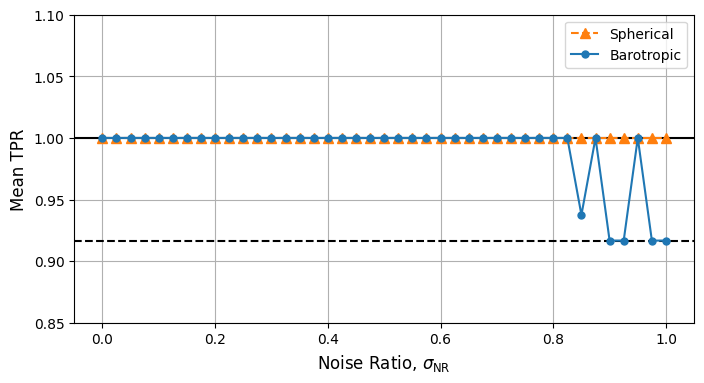

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean and variance (from previous step)
result1 = barotropic_df.groupby('Sigma')['TPR'].agg(['mean','var']).reset_index()
result2 = spherical_df.groupby('Sigma')['TPR'].agg(['mean','var']).reset_index()

# Add standard deviation (square root of variance) as the error
result1['std'] = np.sqrt(result1['var'])
result2['std'] = np.sqrt(result2['var'])

# Plot
plt.figure(figsize=(8, 4))
plt.errorbar(0.025 * result2['Sigma'],
             result2['mean']+1/3,
             #yerr=result2['std'],
             fmt='^',
             #ecolor='blue',
             color = 'tab:orange',
             elinewidth=1,
             capsize=3,
             linestyle='--',
             markersize=7.5,
             label='Spherical')
plt.errorbar(0.025 * result1['Sigma'],
             result1['mean'],
             #yerr=result1['std'],
             fmt='o',
             #ecolor='blue',
             #color = 'blue',
             elinewidth=1,
             capsize=3,
             linestyle='-',
             markersize=5,
             label='Barotropic')
plt.xlabel('Noise Ratio, $\\sigma_{\\rm{NR}}$', fontsize=12)
plt.ylabel('Mean TPR', fontsize=12)
plt.legend()
#plt.yscale('log')
plt.ylim(0.85,1.1)
plt.axhline(y=1,xmin=0,xmax=1,color='k',ls='-')
plt.axhline(y=(result1['mean']).min(),xmin=0,xmax=1,color='k',ls='--')
#plt.axhline(y=2/3,xmin=0,xmax=1,color='k',ls='--')
plt.grid(True)
plt.show()